In [4]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
% matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.
#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

UsageError: Line magic function `%` not found.


In [5]:
train = pd.read_csv("bike-sharing-demand/train.csv")
# 아예 읽을때 datetime으로 읽자
test = pd.read_csv("bike-sharing-demand/test.csv")

In [6]:
df = train.copy()

In [7]:
test_df = test.copy()

In [8]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
df.columns.unique()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [11]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

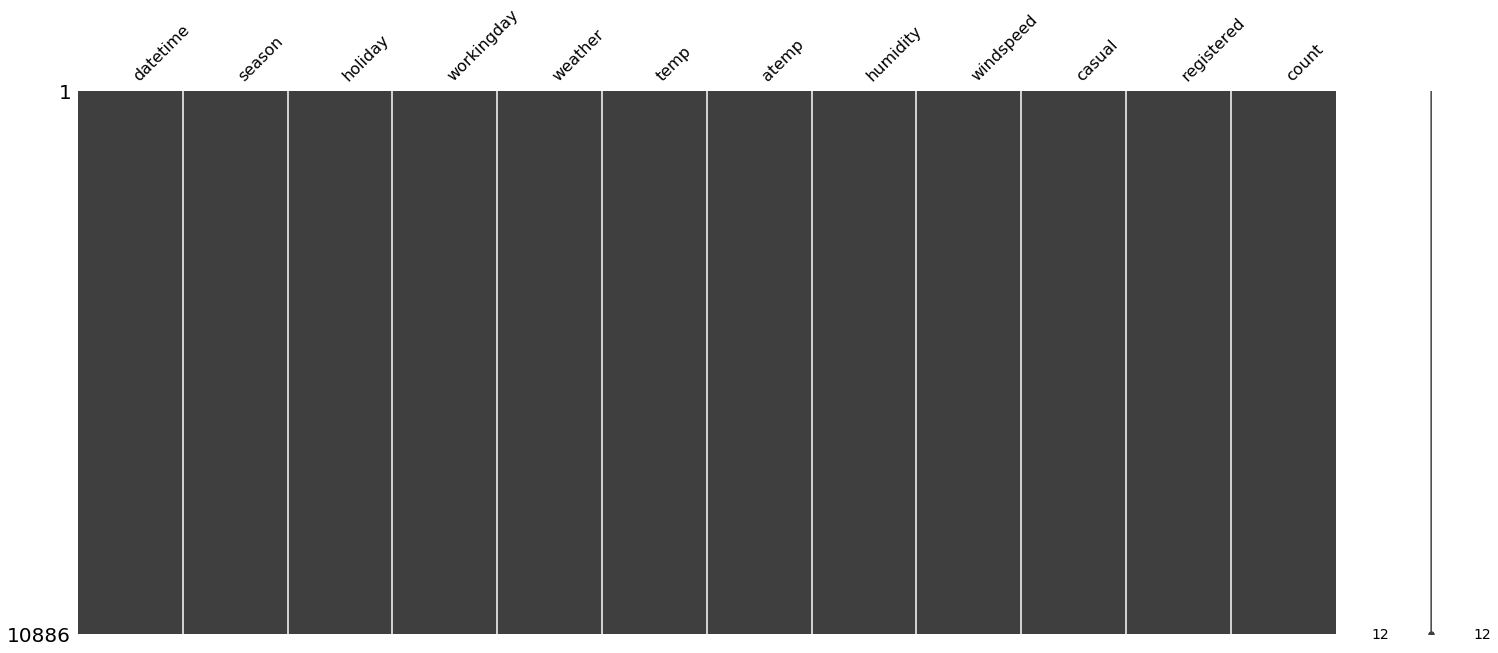

In [12]:
msno.matrix(df)

In [13]:
df.season.value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

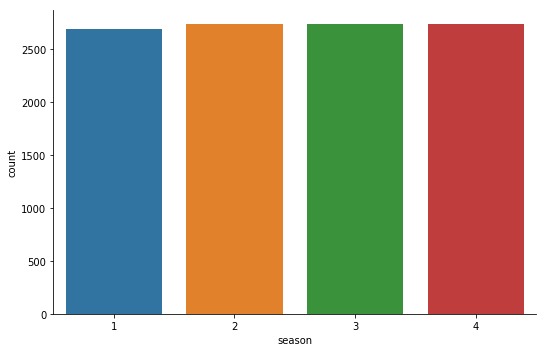

In [15]:
sns.factorplot(x='season',data=df,kind='count',size=5,aspect=1.5)

In [16]:
df.holiday.value_counts()

0    10575
1      311
Name: holiday, dtype: int64

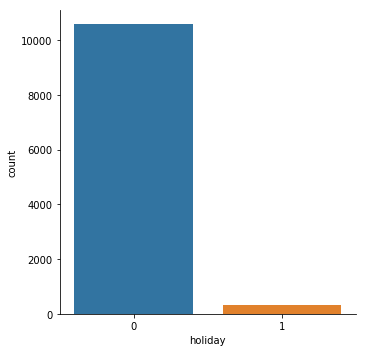

In [17]:
sns.factorplot(x='holiday',data=df,kind='count',size=5,aspect=1) # majority of data is for non holiday days

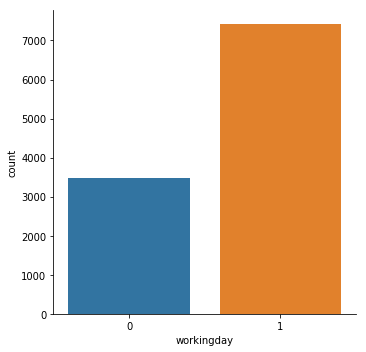

In [18]:
#holiday
df.workingday.value_counts()
sns.factorplot(x='workingday',data=df,kind='count',size=5,aspect=1) # majority of data is for working days.

In [19]:
df.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

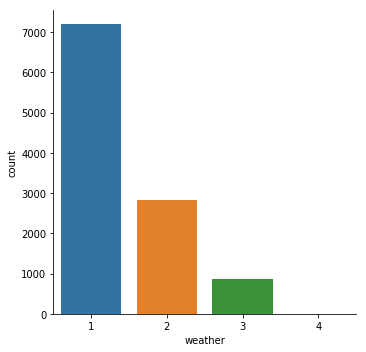

In [20]:
sns.factorplot(x='weather',data=df,kind='count',size=5,aspect=1)  
# 1-> spring
# 2-> summer
# 3-> fall
# 4-> winter

In [21]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


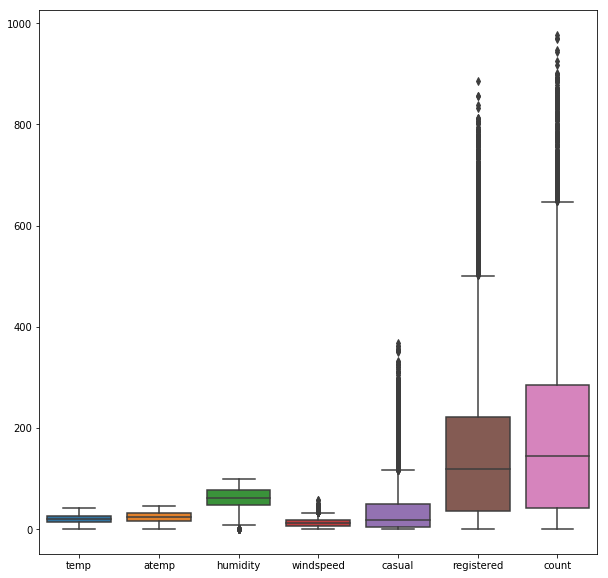

In [24]:
sns.boxplot(data=df[['temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']])
fig=plt.gcf()
fig.set_size_inches(10,10)

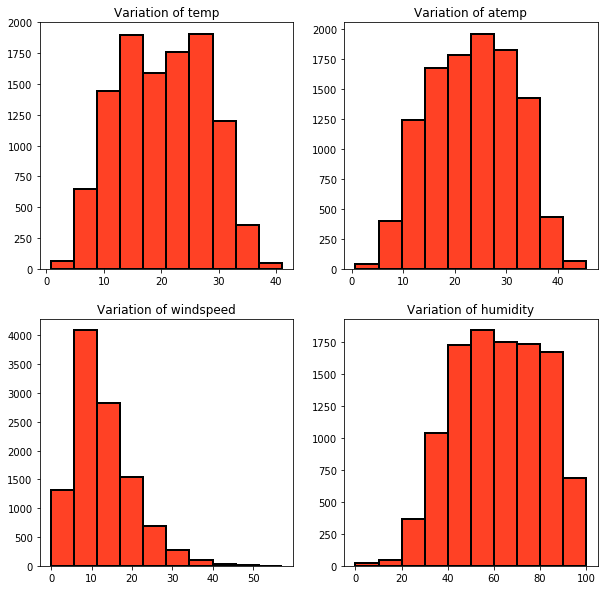

In [25]:
# can also be visulaized using histograms for all the continuous variables.
df.temp.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,0].set_title("Variation of temp")
axes[0,1].hist(x="atemp",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="humidity",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

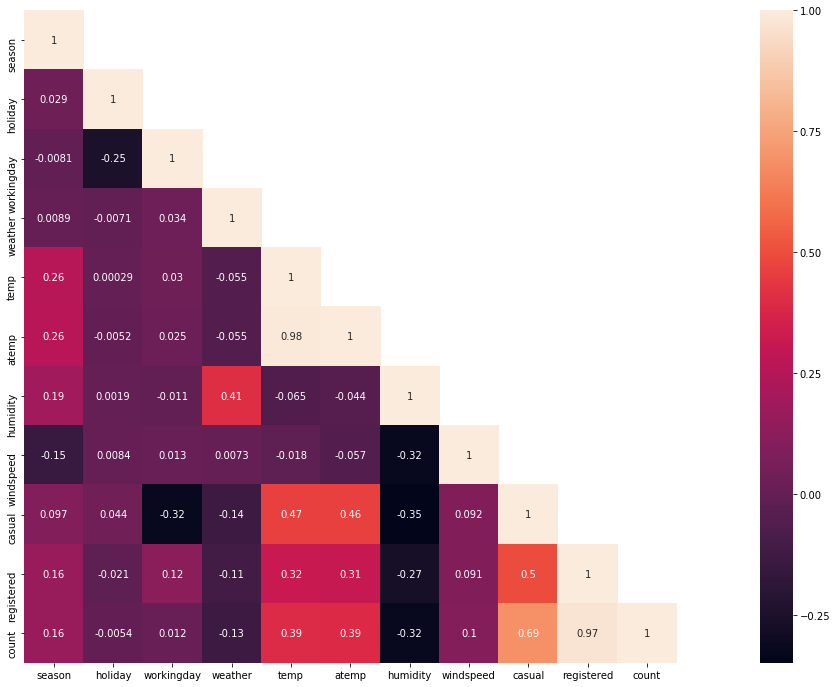

In [26]:
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [27]:
season = pd.get_dummies(df['season'],prefix='season')
df = pd.concat([df,season], axis=1)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,0,0,0


In [28]:
season=pd.get_dummies(test_df['season'],prefix='season')
test_df=pd.concat([test_df,season],axis=1)
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0


In [29]:
# # # same for weather. this is bcoz this will enhance features.
weather=pd.get_dummies(df['weather'],prefix='weather')
df=pd.concat([df,weather],axis=1)
df.head()
weather=pd.get_dummies(test_df['weather'],prefix='weather')
test_df=pd.concat([test_df,weather],axis=1)
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0


In [30]:
# # # now can drop weather and season.
df.drop(['season','weather'],inplace=True,axis=1)
df.head()
test_df.drop(['season','weather'],inplace=True,axis=1)
test_df.head()


# # # also I dont prefer both registered and casual but for ow just let them both.

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0


In [36]:
df['year'] = pd.DatetimeIndex(df['datetime']).year
df['month'] = pd.DatetimeIndex(df['datetime']).month
df['day'] = pd.DatetimeIndex(df['datetime']).day
df['hour'] = pd.DatetimeIndex(df['datetime']).hour
df['year'] = df['year'].map({2011:0, 2012:1})
df.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,season_3,season_4,weather_1,weather_2,weather_3,weather_4,year,month,day,hour
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,...,0,0,1,0,0,0,0,1,1,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,...,0,0,1,0,0,0,0,1,1,1
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,...,0,0,1,0,0,0,0,1,1,2
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,...,0,0,1,0,0,0,0,1,1,3
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,...,0,0,1,0,0,0,0,1,1,4


In [37]:
test_df['year'] = pd.DatetimeIndex(test_df['datetime']).year
test_df['month'] = pd.DatetimeIndex(test_df['datetime']).month
test_df['day'] = pd.DatetimeIndex(test_df['datetime']).day
test_df['hour'] = pd.DatetimeIndex(test_df['datetime']).hour
test_df['year'] = test_df['year'].map({2011:0, 2012:1})
test_df.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,year,month,day,hour
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0,0,1,20,0
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,0,1,20,1
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,0,1,20,2
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,0,1,20,3
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,0,1,20,4


In [38]:
df.drop('datetime',axis=1,inplace=True)
df.head()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,...,season_3,season_4,weather_1,weather_2,weather_3,weather_4,year,month,day,hour
0,0,0,9.84,14.395,81,0.0,3,13,16,1,...,0,0,1,0,0,0,0,1,1,0
1,0,0,9.02,13.635,80,0.0,8,32,40,1,...,0,0,1,0,0,0,0,1,1,1
2,0,0,9.02,13.635,80,0.0,5,27,32,1,...,0,0,1,0,0,0,0,1,1,2
3,0,0,9.84,14.395,75,0.0,3,10,13,1,...,0,0,1,0,0,0,0,1,1,3
4,0,0,9.84,14.395,75,0.0,0,1,1,1,...,0,0,1,0,0,0,0,1,1,4


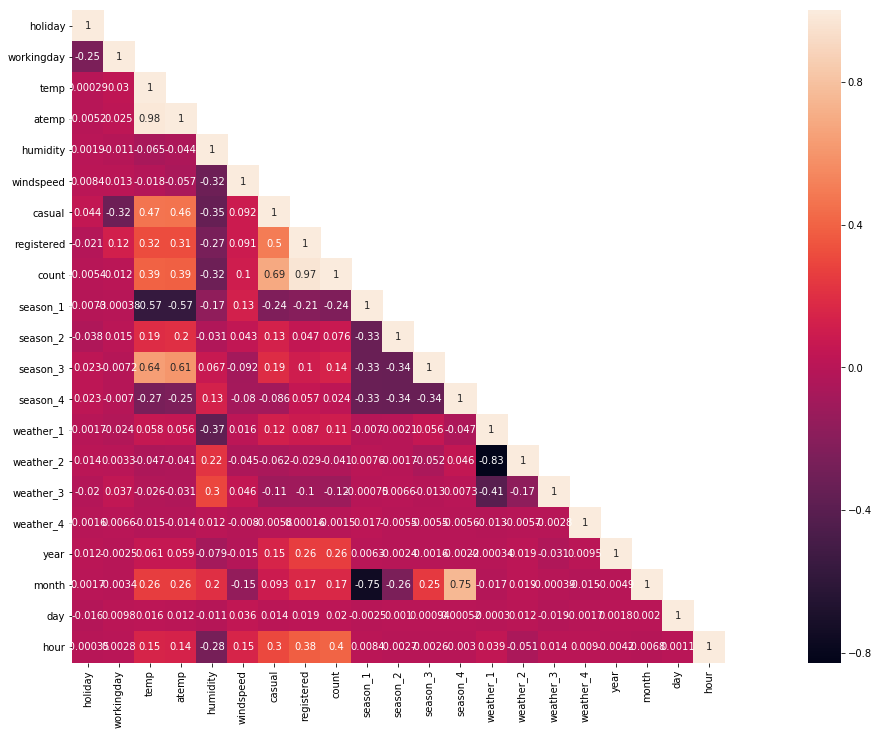

In [39]:
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [40]:
df.drop(['casual','registered'],axis=1,inplace=True)

In [41]:
df.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,year,month,day,hour
0,0,0,9.84,14.395,81,0.0,16,1,0,0,0,1,0,0,0,0,1,1,0
1,0,0,9.02,13.635,80,0.0,40,1,0,0,0,1,0,0,0,0,1,1,1
2,0,0,9.02,13.635,80,0.0,32,1,0,0,0,1,0,0,0,0,1,1,2
3,0,0,9.84,14.395,75,0.0,13,1,0,0,0,1,0,0,0,0,1,1,3
4,0,0,9.84,14.395,75,0.0,1,1,0,0,0,1,0,0,0,0,1,1,4


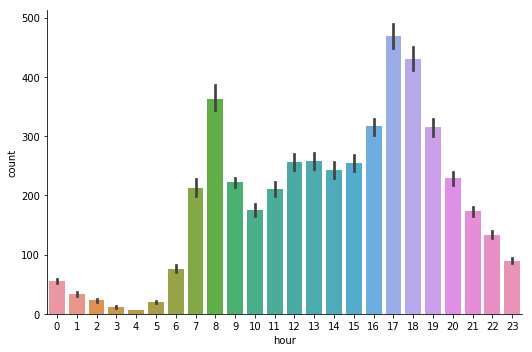

In [42]:
sns.factorplot(x="hour",y="count",data=df,kind='bar',size=5,aspect=1.5)

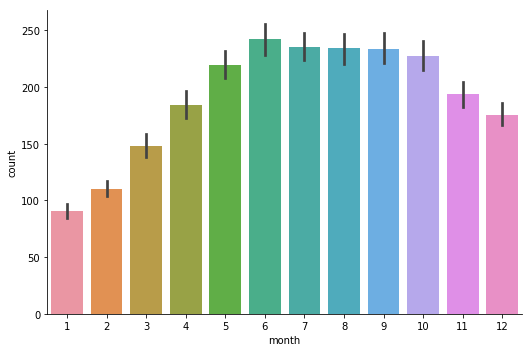

In [45]:
sns.factorplot(x="month",y="count",data=df,kind='bar',size=5,aspect=1.5)
# note that month affects season and that effects wheteher people take bike or not. like climate conditions rainy,hazy etc... .

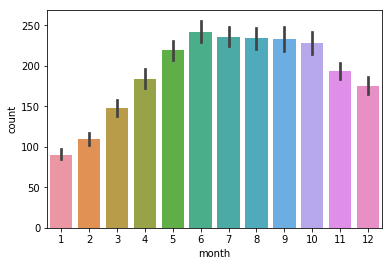

In [48]:
sns.barplot(x="month",y="count",data=df)

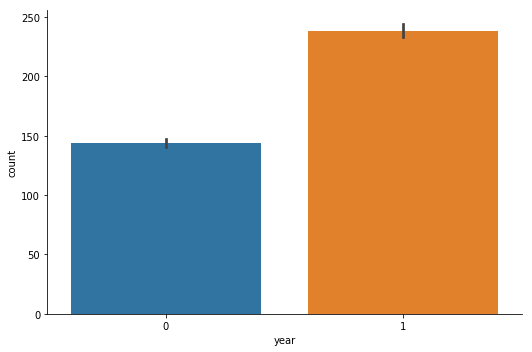

In [49]:
sns.factorplot(x="year",y="count",data=df,kind='bar',size=5,aspect=1.5)
# 0 for 2011 and 1 for 2012. Hence demand has increased over the years.

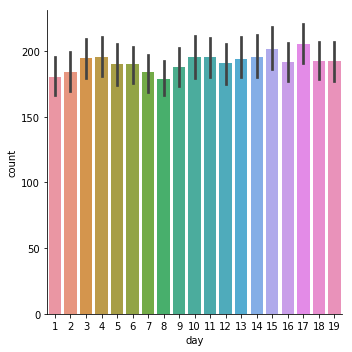

In [50]:
sns.factorplot(x="day",y='count',kind='bar',data=df,size=5,aspect=1)

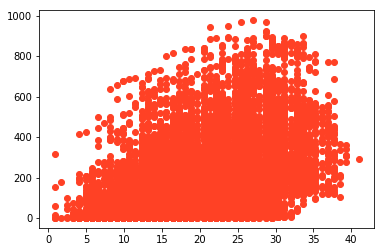

In [51]:
plt.scatter(x="temp",y="count",data=df,color='#ff4125')

In [52]:
new_df = df.copy()
new_df.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

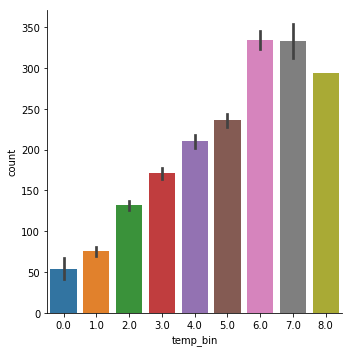

In [53]:
new_df['temp_bin'] = np.floor(new_df['temp'])//5
new_df['temp_bin'].unique()
sns.factorplot(x="temp_bin",y="count",data=new_df,kind='bar')

In [54]:
df.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,year,month,day,hour
0,0,0,9.84,14.395,81,0.0,16,1,0,0,0,1,0,0,0,0,1,1,0
1,0,0,9.02,13.635,80,0.0,40,1,0,0,0,1,0,0,0,0,1,1,1
2,0,0,9.02,13.635,80,0.0,32,1,0,0,0,1,0,0,0,0,1,1,2
3,0,0,9.84,14.395,75,0.0,13,1,0,0,0,1,0,0,0,0,1,1,3
4,0,0,9.84,14.395,75,0.0,1,1,0,0,0,1,0,0,0,0,1,1,4


In [55]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('uint8'): Index(['season_1', 'season_2', 'season_3', 'season_4', 'weather_1',
        'weather_2', 'weather_3', 'weather_4'],
       dtype='object'),
 dtype('int64'): Index(['holiday', 'workingday', 'humidity', 'count', 'year', 'month', 'day',
        'hour'],
       dtype='object'),
 dtype('float64'): Index(['temp', 'atemp', 'windspeed'], dtype='object')}

In [57]:
#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

In [58]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('count',axis=1),df['count'],test_size=0.25,random_state=42)

In [63]:
clf = RandomForestRegressor()
clf.fit(x_train,y_train)
test_pred = clf.predict(x_test)
rmsle = np.sqrt(mean_squared_log_error(test_pred,y_test))
print(rmsle)

0.3582709855585545


In [65]:
test_pred.shape

(2722,)

In [68]:
pred = clf.predict(test_df.drop('datetime',axis=1))

In [69]:
sub = pd.DataFrame()
sub['datetime'] = test['datetime']
sub['count'] = pred
sub.to_csv('submission_bike_4.csv',index=False)

In [73]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 19 columns):
datetime      6493 non-null object
holiday       6493 non-null int64
workingday    6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
season_1      6493 non-null uint8
season_2      6493 non-null uint8
season_3      6493 non-null uint8
season_4      6493 non-null uint8
weather_1     6493 non-null uint8
weather_2     6493 non-null uint8
weather_3     6493 non-null uint8
weather_4     6493 non-null uint8
year          6493 non-null int64
month         6493 non-null int64
day           6493 non-null int64
hour          6493 non-null int64
dtypes: float64(3), int64(7), object(1), uint8(8)
memory usage: 608.8+ KB
